# MVP Análise de Dados e Boas Práticas

**Nome:** Leandro Ribeiro de Castro

**Matrícula:** 4052025000159

**Dataset:** [Predictive Maintenance Dataset - Air Compressor](https://www.kaggle.com/datasets/afumetto/predictive-maintenance-dataset-air-compressor)

# 1. Descrição do Problema

## 1.1. Descrição do Problema

Moto compressores de ar industriais são essenciais para diversas operações fabris. Falhas nesses equipamentos acarretam perdas financeiras, riscos operacionais e paralisações inesperadas. A previsão de falhas com base em dados operacionais pode aumentar a eficiência da manutenção e reduzir custos.

## 1.2. Objetivo da Análise

Construir um modelo preditivo capaz de identificar padrões de funcionamento anormais e antecipar falhas com base em variáveis como temperatura, ruído, vibração, pressão, entre outras.

## 1.3. Hipóteses do Problema

As hipóteses que serão objeto desse estudo são as seguintes:



1.   Compressor com vibração elevada (gacc/hacc) está associado a rolamentos desgastados. → Espera-se que vibrações sejam indicativos de problemas mecânicos como rolamentos desgastados.

2.   Ruído (noise_db) elevado está associado a rolamentos desgastados. → Equipamentos ruidosos podem sinalizar atrito excessivo e/ou desgaste de componentes.

3.   Altas temperaturas na saída ou no sistema de água tem relação com a condição do sistema de refrigeração. → A elevação da temperatura pode preceder falhas térmicas e pode ser indicativo de falta de manutenção no sistema de arrefecimento.

4.   Pressão de saída fora da faixa operacional indica válvula de escape ou obstrução. → Pressões anormais podem apontar falhas e/ou bloqueio na válvula de escape.

5.   Pressão na bomba do sistema de água tem relação com a condição do sistema de refrigeração. → A elevação da pressão na bomba da água de arrefecimento pode preceder falhas térmicas e pode ser indicativo de falta de manutenção no sistema de arrefecimento.

## 1.4. Tipo de Problema

Classificação supervisionada com variáveis alvo 'bearings', 'wpump', 'radiator' e 'exvalve'

## 1.5. Seleção dos Dados

Todos os registros do dataset foram utilizados. Variáveis irrelevantes ou identificadores únicos como id foram descartadas.

## 1.6. Atributos do Dataset

Numéricos contínuos: rpm, motor_power, torque, noise_db, outlet_temp, air_flow, gaccx/y/z, haccx/y/z, outlet_pressure_bar, water_inlet_temp, water_outlet_temp

Categóricos: bearings, wpump, radiator, exvalve, acmotor

# 2. Coleta dos Dados

2.1. Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Predictive Maintenance Dataset - Air Compressor.

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
# carregamento do dataset
df = pd.read_csv("/content/data.csv")

In [128]:
# primeiras linhas
df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,Ok,Ok,Clean,Clean,Stable
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,Ok,Ok,Clean,Clean,Stable
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,Ok,Ok,Clean,Clean,Stable
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,Ok,Ok,Clean,Clean,Stable
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,Ok,Ok,Clean,Clean,Stable


In [129]:
# últimas linhas
df.tail()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
995,996,2485,18141.24251,72.206554,6.938,470.274717,66.714857,145.634454,3.667832,105.736828,...,0.351149,6.469546,1.054365,1.359977,4.734390,Ok,Ok,Clean,Dirty,Stable
996,997,2519,18811.53155,74.163503,7.109,476.563145,64.476072,150.506361,3.057030,101.870016,...,0.339553,6.700342,1.056868,1.286475,4.817608,Ok,Ok,Clean,Dirty,Stable
997,998,2514,18784.92304,71.763552,7.113,473.831118,60.419933,148.222981,3.567040,113.542220,...,0.334793,6.704334,1.056126,1.358090,4.856507,Ok,Ok,Clean,Dirty,Stable
998,999,2490,18612.82721,73.097871,7.113,468.394650,62.068962,149.739912,2.692823,116.654248,...,0.344867,6.710383,1.051912,1.349688,4.851370,Ok,Ok,Clean,Dirty,Stable
999,1000,2499,19454.55908,78.928760,7.425,469.821267,61.903520,151.644958,3.013953,115.976961,...,0.368466,7.170283,1.049239,1.355913,5.078841,Ok,Ok,Clean,Dirty,Stable


# 3. Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Predictive Maintenance Dataset - Air Compressor, visamos entender a distribuição, as relações e as características das variáveis, pontos cruciais para as etapas subsequentes de pré-processamento e modelagem.

## 3.1 Total e Tipo das Instâncias

O dataset possui 1000 instâncias (observações) e 1 espécie, distribuídas em 3 tipos float, int, object. As 20 características de medição são de tipo numérico (float), enquanto os atributos 'bearings, wpump, radiator, exvalve, acmotor' são categórico.

In [130]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 1000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1000 non-null   int64  
 1   rpm                  1000 non-null   int64  
 2   motor_power          1000 non-null   float64
 3   torque               1000 non-null   float64
 4   outlet_pressure_bar  1000 non-null   float64
 5   air_flow             1000 non-null   float64
 6   noise_db             1000 non-null   float64
 7   outlet_temp          1000 non-null   float64
 8   wpump_outlet_press   1000 non-null   float64
 9   water_inlet_temp     1000 non-null   float64
 10  water_outlet_temp    1000 non-null   float64
 11  wpump_power          1000 non-null   float64
 12  water_flow           1000 non-null   float64
 13  oilpump_power        1000 non-null   float64
 14  oil_tank_temp        1000 non-null 

## 3.2. Verificação e Tratamento de Valores Nulos

O tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [131]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Predictive Maintenance Dataset - Air Compressor:")
df.isnull().sum()

Valores nulos no dataset Predictive Maintenance Dataset - Air Compressor:


,0
id,0
rpm,0
motor_power,0
torque,0
outlet_pressure_bar,0
air_flow,0
noise_db,0
outlet_temp,0
wpump_outlet_press,0
water_inlet_temp,0


Não foram encontrados valores nulos / faltantes no dataset original, conforme demostrado acima e também no tópico anterior (campo Non-Null Count do item 3.1).

## 3.1 Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [132]:
# estatísticas descritivas básicas do dataset
df.describe()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,wpump_power,water_flow,oilpump_power,oil_tank_temp,gaccx,gaccy,gaccz,haccx,haccy,haccz
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1499.516000,6984.877371,49.186120,4.054049,754.673930,53.412121,118.855110,2.799610,83.021711,...,222.185445,53.708176,300.484123,46.237663,0.601789,0.349667,3.923073,1.101253,1.350042,3.495037
std,288.819436,707.681915,4269.277571,18.706750,1.862761,442.743491,8.055363,19.120181,0.455274,18.644992,...,3.774537,6.587259,0.408703,0.196139,0.058719,0.040667,1.610130,0.058546,0.040871,0.817667
min,1.000000,480.000000,1402.424603,13.222197,1.000000,95.098952,39.879017,76.902822,1.834533,43.166392,...,213.525207,38.570791,299.507859,45.806178,0.540045,0.274650,1.730301,1.039910,1.270696,2.329267
25%,250.750000,988.750000,3559.437042,33.749857,2.443750,305.388152,46.490976,104.731080,2.448208,68.914714,...,219.471768,50.459245,300.187873,46.090060,0.558092,0.316543,2.576739,1.057717,1.318785,2.802622
50%,500.500000,1500.000000,5906.662534,48.890905,4.038000,608.626411,52.708480,118.275842,2.780492,82.101660,...,221.889622,58.112667,300.470013,46.236213,0.576814,0.349343,3.610639,1.075392,1.348189,3.339698
75%,750.250000,2010.000000,9636.002782,63.672921,5.600250,1193.266273,60.158248,132.850790,3.092101,95.792346,...,224.721620,58.552897,300.774788,46.378237,0.615021,0.375261,5.081960,1.113696,1.375232,4.071874
max,1000.000000,2520.000000,19454.559080,93.540405,8.664000,1539.911634,74.401986,172.711382,4.295136,137.543531,...,235.342910,59.174992,301.435483,46.755690,0.726604,0.459811,9.209166,1.227134,1.461809,6.107852


### 3.3.1. Média
A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [133]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
id,500.500000
rpm,1499.516000
motor_power,6984.877371
torque,49.186120
outlet_pressure_bar,4.054049
air_flow,754.673930
noise_db,53.412121
outlet_temp,118.855110
wpump_outlet_press,2.799610
water_inlet_temp,83.021711


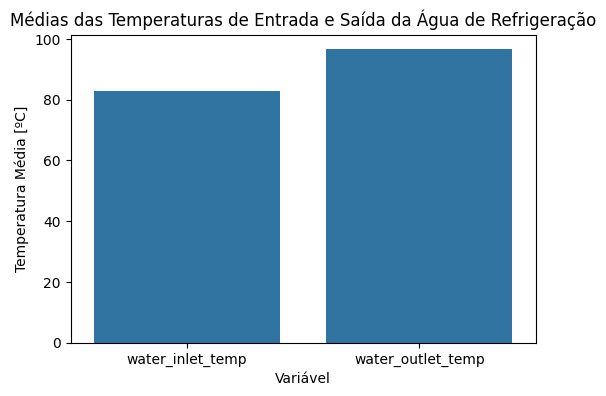

In [134]:
# Gráfico das médias dos atributos Temperatura do Ar e do Processo

# Variáveis que você quer plotar as médias
variables_to_plot = ['water_inlet_temp', 'water_outlet_temp']

# Extrair as médias para essas variáveis
df_mean = df.describe().loc['mean']
mean_values = df_mean[variables_to_plot]

# Preparar o gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x=mean_values.index, y=mean_values.values)
plt.title('Médias das Temperaturas de Entrada e Saída da Água de Refrigeração')
plt.ylabel('Temperatura Média [ºC]')
plt.xlabel('Variável')

# Mostrar o gráfico
plt.show()

O gráfico de barras acima compara as médias das variáveis de temperatura de entrada e saída da água de refrigeração do compressor: 'water_inlet_temp' e 'water_outlet_temp'.

Ele mostra que a 'water_outlet_temp' possui uma média superior à 'water_inlet_temp', o que é normal, visto que no sistema de regrigeração entra mais fria para reduzir a temperatura do compressor, saindo mais quente e passando pelo sistema de refrigeração.

A média da temperatura da água na entrada está próxima de 80 ºC, enquanto a da temperatura da água na saída p´roxima de 100 ºC.

### 3.3.2. Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [135]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
id,288.819436
rpm,707.681915
motor_power,4269.277571
torque,18.706750
outlet_pressure_bar,1.862761
air_flow,442.743491
noise_db,8.055363
outlet_temp,19.120181
wpump_outlet_press,0.455274
water_inlet_temp,18.644992


#### 3.3.2.1. Vibração

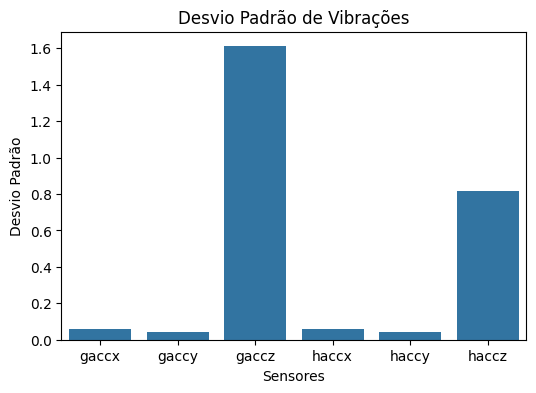

In [136]:
# Variáveis de vibração que serão plotados os desvios padrão
failure_modes_to_plot = ['gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz']

# Extrair os desvios padrão para essas variáveis
df_std = df.describe().loc['std']
std_values = df_std[failure_modes_to_plot]

# Preparar o gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x=std_values.index, y=std_values.values)
plt.title('Desvio Padrão de Vibrações')
plt.ylabel('Desvio Padrão')
plt.xlabel('Sensores')

# Mostrar o gráfico
plt.show()

O gráfico acima apresenta o desvio padrão de cada variável dos sensores de vibração:

GACCZ (1.61) e HACCZ (0.81) apresentam os maiores desvios padrão. Isso indica que as medições de vibração no eixo Z (vertical) têm a maior variabilidade, o que pode sugerir movimentos ou oscilações mais intensas ou irregulares nessa direção.

GACCX (0.058) e HACCX (0.058) possuem desvios padrão muito próximos e significativamente menores que os do eixo Z. Isso sugere que a vibração no eixo X (horizontal) é menos variável e mais consistente.

GACCY (0.04) e HACCY (0.04) têm os menores desvios padrão entre todas as variáveis dos sensores de vibração. Isso indica que a vibração no eixo Y (transversal) é a mais estável e menos variável.

Em resumo, a vibração no eixo vertical (Z) mostra a maior variabilidade, enquanto a vibração no eixo transversal (Y) é a mais estável. A vibração no eixo horizontal (X) apresenta uma variabilidade intermediária. Essa análise sugere que problemas de vibração, se presentes, podem ser mais evidentes nas medições do eixo Z.

#### 3.3.2.2. Ruído

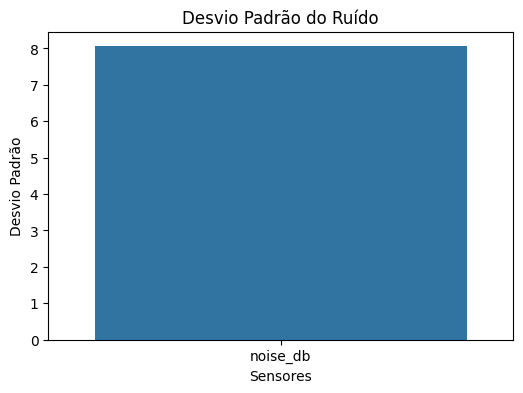

In [137]:
# Variáveis de vibração que serão plotados os desvios padrão
failure_modes_to_plot = ['noise_db']

# Extrair os desvios padrão para essas variáveis
df_std = df.describe().loc['std']
std_values = df_std[failure_modes_to_plot]

# Preparar o gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x=std_values.index, y=std_values.values)
plt.title('Desvio Padrão do Ruído')
plt.ylabel('Desvio Padrão')
plt.xlabel('Sensores')

# Mostrar o gráfico
plt.show()

O gráfico acima apresenta o desvio padrão do ruído, que mostra uma maior variabilidade em relação a vibração. Essa análise sugere que problemas e falhas, se presentes, podem ser mais evidentes nas medições do ruído, porém, ainda há analises a ser realizadas, como a correlação das medições do ruído com o rpm do motor, que pode ser o indicativo da variabilidade.

## 3.4. Análises Gráficas

### 3.4.1. Distribuição das codições das variáveis qualitativas

In [138]:
# Distribuição das variáveis categóricas
categorical_vars = ['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor']
for var in categorical_vars:
    print(f"Distribuição da variável '{var}':")
    print(df[var].value_counts())
    print("-" * 30)

Distribuição da variável 'bearings':
bearings
Ok       800
Noisy    200
Name: count, dtype: int64
------------------------------
Distribuição da variável 'wpump':
wpump
Ok       800
Noisy    200
Name: count, dtype: int64
------------------------------
Distribuição da variável 'radiator':
radiator
Clean    800
Dirty    200
Name: count, dtype: int64
------------------------------
Distribuição da variável 'exvalve':
exvalve
Clean    800
Dirty    200
Name: count, dtype: int64
------------------------------
Distribuição da variável 'acmotor':
acmotor
Stable    1000
Name: count, dtype: int64
------------------------------


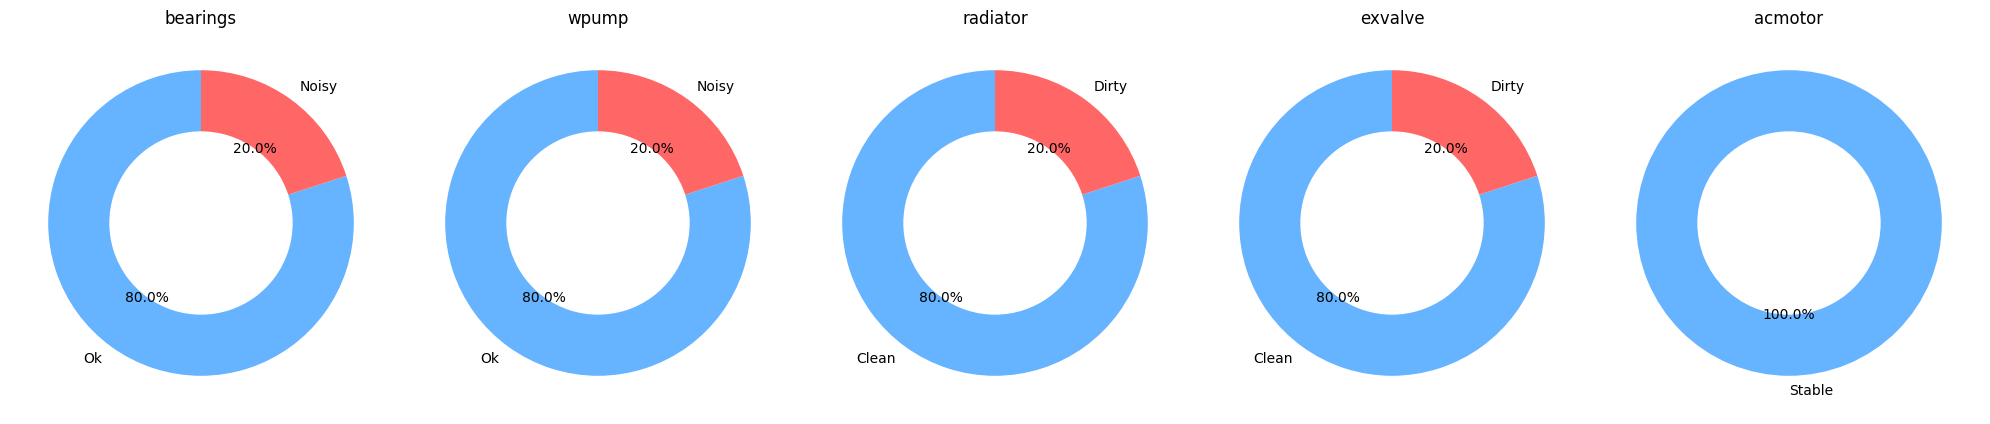

In [139]:
# Variáveis categóricas a serem plotadas
categorical_vars = ['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor']

# Cria uma figura e um conjunto de subplots
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(20, 5)) # 1 linha, 5 colunas

# Definição de cores do gráfico
colors = ['#66b3ff', '#ff6666']

# Cria um gráfico de rosca para cada uma
for i, var in enumerate(categorical_vars):
    fq_counts = df[var].value_counts()
    axes[i].pie(fq_counts, labels=fq_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'width': 0.4})
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

**Rolamento (bearings)**: 20% dos dados apresentam ruído, indicando um possível problema.

**Bomba da Água (wpump)**: 20% dos dados apresentam ruído, indicando um possível problema.

**Radiador (radiator)**: 20% dos dados apresentam a condição de sujos.

**Válvula de Escape (exvalve)**: 20% dos dados apresentam a condição de sujos.

**Corrente Elétrica do Motor (acmotor)**: Está sempre no estado 'Estável' neste dataset, o que significa que esta variável não tem variação e provavelmente não será útil para prever falhas.

Em resumo, 'bearings', 'wpump', 'radiator' e 'exvalve' podem ser importantes preditores de falha.

### 3.4.2. Histogramas

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

##### 3.4.2.1. Temperatura da Água de Refrigeração do Compressor

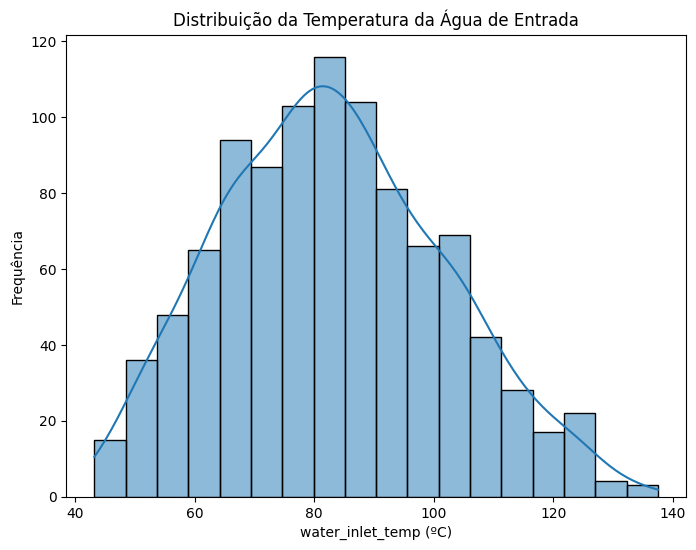

In [140]:
plt.figure(figsize=(8, 6))
# Histograma da temperatura da água de entrada
sns.histplot(df['water_inlet_temp'], kde=True)
plt.title('Distribuição da Temperatura da Água de Entrada')
plt.xlabel('water_inlet_temp (ºC)')
plt.ylabel('Frequência')
plt.show()

A curva de densidade estimada (KDE) que acompanha o histograma nos permite analisar a forma dessa distribuição.

Com base na curva de densidade, a distribuição da temperatura da água de entrada de refrigeração do compressor forma que se assemelha bastante a uma distribuição normal (ou gaussiana). Ela é unimodal, com um pico central evidente em torno de 80 ºC. Isso sugere que a maioria dos valores se concentram em torno desse valor médio. A distribuição parece ser relativamente simétrica em torno de seu pico, com as frequências diminuindo gradualmente à medida que os valores se afastam do centro, tanto para valores menores quanto para valores maiores.

Essa característica de uma distribuição unimodal e aproximadamente simétrica, com a maioria dos dados agrupada em torno de uma média, é comum em muitos processos naturais e manufaturados, indicando uma variação esperada em torno de um valor típico, sem a presença de múltiplos grupos ou subpopulações distintas de torque.

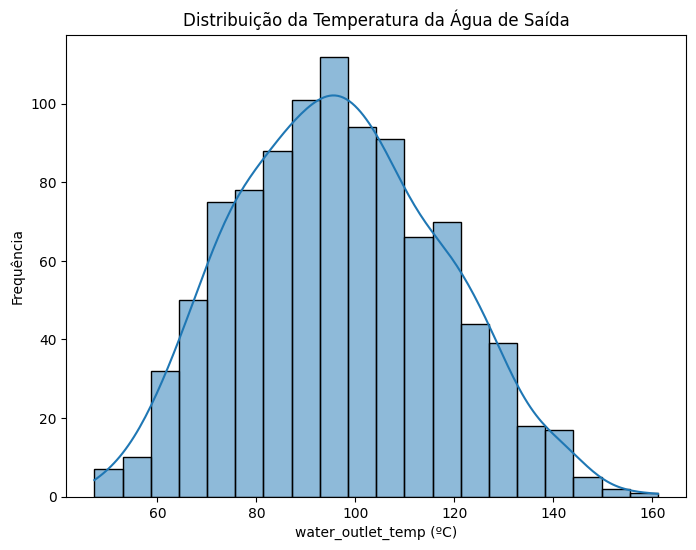

In [141]:
plt.figure(figsize=(8, 6))
# Histograma da temperatura da água de saída
sns.histplot(df['water_outlet_temp'], kde=True)
plt.title('Distribuição da Temperatura da Água de Saída')
plt.xlabel('water_outlet_temp (ºC)')
plt.ylabel('Frequência')
plt.show()

A curva de densidade estimada (KDE) que acompanha o histograma nos permite analisar a forma dessa distribuição.

Com base na curva de densidade, a distribuição da temperatura da água de saída de refrigeração do compressor forma que se assemelha bastante a uma distribuição normal (ou gaussiana). Ela é unimodal, com um pico central evidente em torno de 100 ºC. Isso sugere que a maioria dos valores se concentram em torno desse valor médio. A distribuição parece ser relativamente simétrica em torno de seu pico, com as frequências diminuindo gradualmente à medida que os valores se afastam do centro, tanto para valores menores quanto para valores maiores.

Essa característica de uma distribuição unimodal e aproximadamente simétrica, com a maioria dos dados agrupada em torno de uma média, é comum em muitos processos naturais e manufaturados, indicando uma variação esperada em torno de um valor típico, sem a presença de múltiplos grupos ou subpopulações distintas de torque.

##### 3.4.2.2. Velocidade Rotational

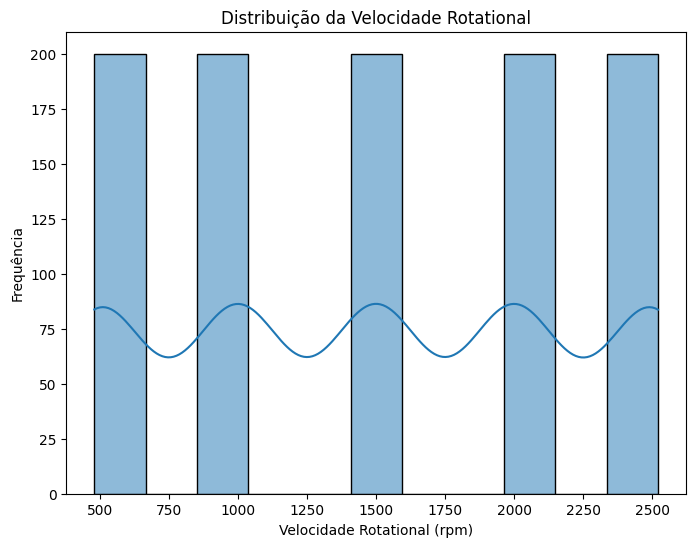

In [142]:
plt.figure(figsize=(8, 6))
# Histograma do RPM
sns.histplot(df['rpm'], kde=True)
plt.title('Distribuição da Velocidade Rotational')
plt.xlabel('Velocidade Rotational (rpm)')
plt.ylabel('Frequência')
plt.show()

A curva de densidade estimada (KDE) que acompanha o histograma nos permite analisar a forma dessa distribuição.

A distribuição da velocidade rotacional apresenta múltiplos picos, o que a caracteriza como uma distribuição multimodal. Existem concentrações notáveis de dados em diferentes faixas de RPM, sugerindo que o compressor opera em diferentes regimes de velocidade. A distribuição não é simétrica, mostrando assimetria e indicando que a frequência dos valores não diminui uniformemente em torno de um único ponto central. A presença desses picos múltiplos indica que há subpopulações ou modos de operação distintos para a velocidade rotational do compressor neste dataset.

##### 3.4.2.3. Torque

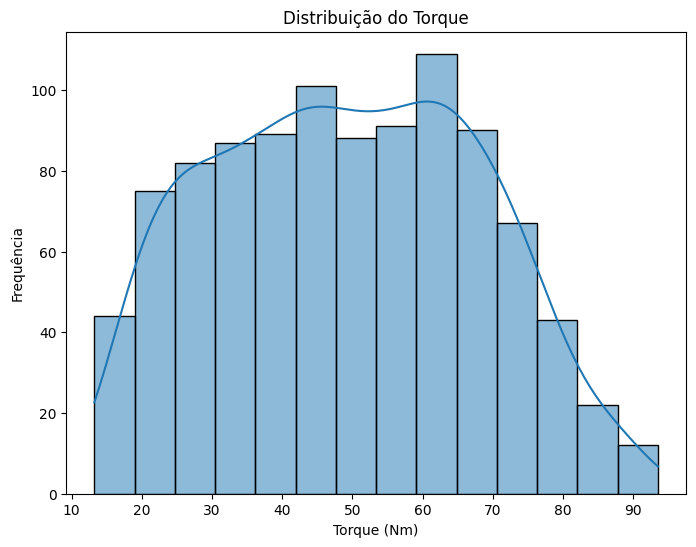

In [143]:
plt.figure(figsize=(8, 6))
# Histograma do Torque
sns.histplot(df['torque'], kde=True)
plt.title('Distribuição do Torque')
plt.xlabel('Torque (Nm)')
plt.ylabel('Frequência')
plt.show()

A curva de densidade estimada (KDE) que acompanha o histograma nos permite analisar a forma dessa distribuição.

A distribuição do torque apresenta múltiplos picos, caracterizando-a como uma distribuição multimodal. Isso sugere que o compressor opera em diferentes níveis de torque. A distribuição não é simétrica e tem uma ligeira cauda para a direita, indicando a presença de valores de torque mais altos com menor frequência. A presença desses picos múltiplos sugere diferentes modos de operação ou cargas aplicadas ao compressor.

##### 3.4.2.3. Potência do Motor

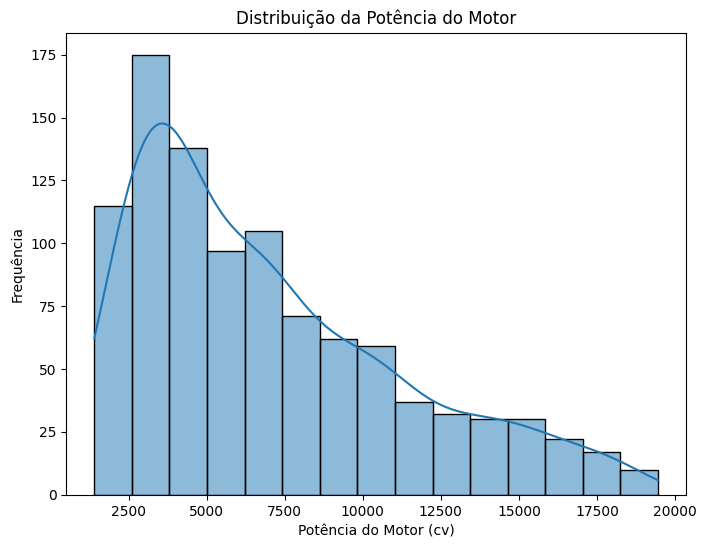

In [144]:
plt.figure(figsize=(8, 6))
# Histograma da Potência do Motor
sns.histplot(df['motor_power'], kde=True)
plt.title('Distribuição da Potência do Motor')
plt.xlabel('Potência do Motor (cv)')
plt.ylabel('Frequência')
plt.show()

A curva de densidade estimada (KDE) que acompanha o histograma nos permite analisar a forma dessa distribuição.

A distribuição da potência do motor apresenta múltiplos picos, indicando que o compressor opera em diferentes níveis de potência. A distribuição não é simétrica, e tem uma cauda mais longa para a direita, sugerindo a ocorrência menos frequente de valores de potência mais elevados. A multimodalidade sugere distintos modos de operação do motor em termos de demanda de potência.

## 3.4.5. Boxplot

### 3.4.5.1. Vibração X Estado do Rolamento


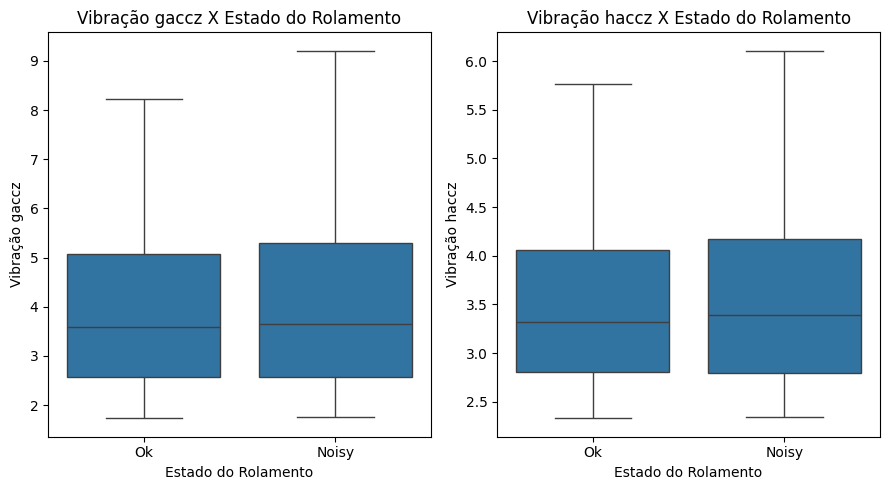

In [145]:
# Variáveis de vibração
vibration_vars = ['gaccz', 'haccz']

# Cria uma figura e um conjunto de subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 5))

# Achatar o array de eixos para facilitar a iteração
axes = axes.flatten()

# Itera sobre as variáveis de vibração e cria um boxplot para cada uma
for i, var in enumerate(vibration_vars):
    sns.boxplot(x='bearings', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Vibração {var} X Estado do Rolamento')
    axes[i].set_xlabel('Estado do Rolamento')
    axes[i].set_ylabel(f'Vibração {var}')

plt.tight_layout()
plt.show()

Com base nos boxplots da Vibração (gaccz e haccz) versus o Estado do Rolamento, podemos tirar as seguintes conclusões:

**Diferença nas Medianas:** Para ambas as variáveis de vibração (gaccz e haccz), a mediana (a linha central dentro da caixa) é visivelmente maior para os rolamentos no estado 'Noisy' em comparação com os rolamentos no estado 'Ok'. Isso sugere que, em média, os rolamentos ruidosos apresentam níveis de vibração mais elevados.

**Maior Dispersão em Rolamentos Ruidosos**: A caixa (que representa o Intervalo Interquartil - IQR, ou seja, os 50% centrais dos dados) é maior para os rolamentos 'Noisy' em ambas as variáveis de vibração. Isso indica que há uma maior variabilidade ou dispersão nos níveis de vibração quando o rolamento está ruidoso. Os dados de vibração para rolamentos 'Ok' são mais concentrados.

**Relação Clara**: Os boxplots demonstram uma relação clara e esperada: rolamentos ruidosos tendem a vibrar mais, especialmente no eixo Z (representado por gaccz e haccz), que já identificamos como tendo a maior variabilidade na análise de desvio padrão.

Em resumo, os boxplots das variáveis de vibração gaccz e haccz fornecem forte evidência visual para a hipótese de que compressores com rolamentos ruidosos ('Noisy') têm maior chance de apresentar vibração elevada, especialmente no eixo Z. Essa análise corrobora a ideia de que as medições de vibração, particularmente no eixo Z, podem ser importantes preditores de problemas nos rolamentos.

### 3.4.5.2. Ruído X Estado do Rolamento


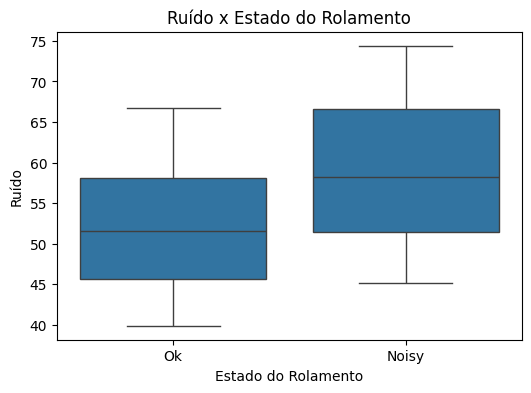

In [146]:
# Relação entre ruído e estado do rolamento
plt.figure(figsize=(6, 4))
sns.boxplot(x='bearings', y='noise_db', data=df)
plt.title('Ruído x Estado do Rolamento')
plt.xlabel('Estado do Rolamento')
plt.ylabel('Ruído')

# Mostrar o boxplot
plt.show()

Com base no boxplot do Ruído (noise_db) versus o Estado do Rolamento, podemos tirar as seguintes conclusões:

**Diferença nas Medianas:** A mediana do ruído é visivelmente mais alta para os rolamentos no estado 'Noisy' em comparação com os rolamentos no estado 'Ok'. Isso sugere que, em média, rolamentos ruidosos geram maior ruído no conjunto, o que é intuitivo.

**Maior Dispersão em Rolamentos Ruidosos:** A caixa (IQR) para os rolamentos 'Noisy' é maior do que para os rolamentos 'Ok'. Isso indica uma maior variabilidade nos níveis de ruído do conjunto quando o rolamento está ruidoso.

**Relação Clara:** O boxplot demonstra uma relação clara entre o estado do rolamento e o nível de ruído, suportando a hipótese de que rolamentos ruidosos estão associados a níveis de ruído mais altos no conjunto.

Em resumo, o boxplot do ruído vs estado do rolamento confirma a expectativa de que rolamentos ruidosos produzem mais ruído no conjunto e apresentam maior variabilidade nos níveis de ruído do conjunto. Esta variável parece ser um bom indicador do estado do rolamento.

### 3.4.5.3. Temperatura da Água X Estado da Bomba da Água


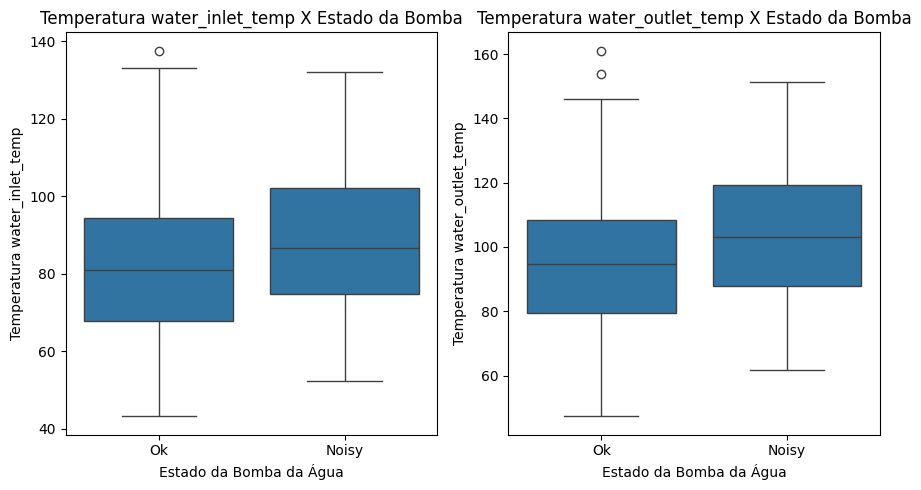

In [147]:
# Variáveis de temperatura
vibration_vars = ['water_inlet_temp', 'water_outlet_temp']

# Cria uma figura e um conjunto de subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 5))

# Achatar o array de eixos para facilitar a iteração
axes = axes.flatten()

# Itera sobre as variáveis de vibração e cria um boxplot para cada uma
for i, var in enumerate(vibration_vars):
    sns.boxplot(x='wpump', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Temperatura {var} X Estado da Bomba')
    axes[i].set_xlabel('Estado da Bomba da Água')
    axes[i].set_ylabel(f'Temperatura {var}')

plt.tight_layout()
plt.show()

Com base nos boxplots das temperaturas da água de entrada (water_inlet_temp) e saída (water_outlet_temp) versus o Estado da Bomba da Água, podemos tirar as seguintes conclusões:

**Temperatura da Água de Entrada (water_inlet_temp):** Observamos que a mediana para o estado 'Noisy' da bomba da água está posicionada perceptivelmente acima da mediana para o estado 'Ok'. A elevação da mediana no estado 'Noisy' indica que, em média, a bomba da água no estado ruidoso está associada a temperaturas de entrada da água mais elevadas, o que gera menor eficiência no resfriamento do compressor.

**Dispersão (water_inlet_temp):** A caixa (IQR) para o estado 'Ok' parece próxima ao do estado 'Noisy', indicando que os 50% centrais dos dados de temperatura de entrada da água têm uma variação semelhante quando a bomba está 'Ok'. Os "bigodes", no estado 'Noisy' tem uma variação menor que no estado 'Ok', reforçando a ideia de que a variação geral da temperatura de entrada é menor quando a bomba está no estado 'Noisy'.

**Outliers (water_inlet_temp):** A presença de outliers em no estado 'Ok' sugere que, podem ocorrer medições de temperatura de entrada incomuns. É importante investigar se esses outliers representam condições operacionais atípicas, erros de medição ou outros fatores externos que influenciam a temperatura da água de entrada.

**Temperatura da Água de Saída (water_outlet_temp):** Observamos que a mediana para o estado 'Noisy' da bomba da água está posicionada perceptivelmente acima da mediana para o estado 'Ok'. A elevação da mediana no estado 'Noisy' indica que, em média, a bomba da água no estado ruidoso está associada a temperaturas de saída da água mais elevadas, o que gera menor eficiência no resfriamento do compressor.

**Dispersão (water_outlet_temp):** A caixa (IQR) para o estado 'Ok' parece próxima ao do estado 'Noisy', indicando que os 50% centrais dos dados de temperatura de saída da água têm uma variação semelhante quando a bomba está 'Ok'. Os "bigodes", no estado 'Noisy' tem uma variação menor que no estado 'Ok', reforçando a ideia de que a variação geral da temperatura de saída é menor quando a bomba está no estado 'Noisy'.

**Outliers (water_outlet_temp):** A presença de outliers em no estado 'Ok' sugere que, podem ocorrer medições de temperatura de entrada incomuns. É importante investigar se esses outliers representam condições operacionais atípicas, erros de medição ou outros fatores externos que influenciam a temperatura da água de saída.

**Relação:** Considerando a diferença consistente na mediana das temperaturas da água entre os estados 'Ok' e 'Noisy', conforme visível no boxplot, pode-se interpretar que as temperaturas da água é um indicador do estado da bomba da água. A tendência de temperaturas mais altas no estado 'Noisy' sugere que problemas na bomba da água podem impactar a eficiência do sistema de refrigeração, levando a um aumento na temperatura da água sistema de refrigeração do compressor.

Em resumo, os boxplots das temperaturas da água mostram uma diferença na mediana entre os estados 'Ok' e 'Noisy', o que é um indicativo relevante do estado da bomba da água e resfriamento do compressor. Embora a magnitude visual dessa diferença possa ser menor do que em outras relações analisadas, a elevação das temperaturas no estado 'Noisy' suporta a ideia de que estas variáveis é importante para identificar problemas no sistema de refriamento do compressor.

### 3.4.5.4. Temperatura da Água X Estado do Radiador


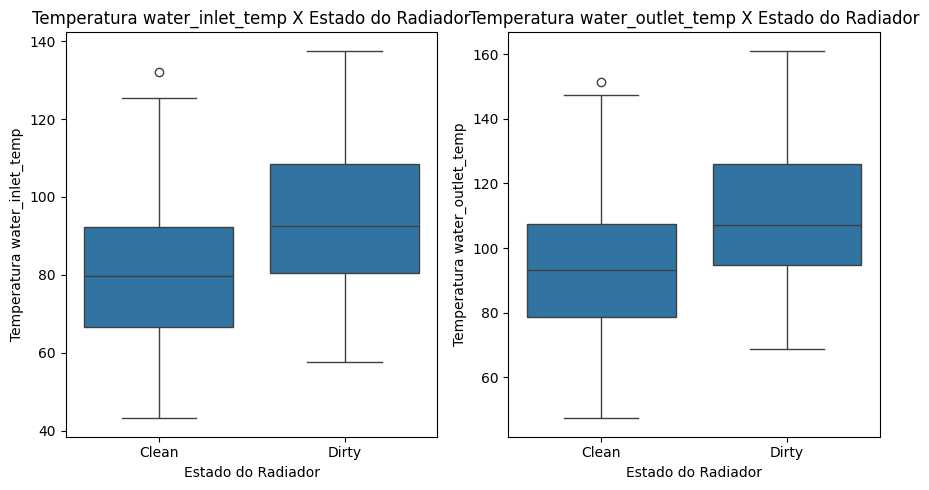

In [148]:
# Variáveis de temperatura
vibration_vars = ['water_inlet_temp', 'water_outlet_temp']

# Cria uma figura e um conjunto de subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 5))

# Achatar o array de eixos para facilitar a iteração
axes = axes.flatten()

# Itera sobre as variáveis de vibração e cria um boxplot para cada uma
for i, var in enumerate(vibration_vars):
    sns.boxplot(x='radiator', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Temperatura {var} X Estado do Radiador')
    axes[i].set_xlabel('Estado do Radiador')
    axes[i].set_ylabel(f'Temperatura {var}')

plt.tight_layout()
plt.show()

Com base nos boxplots das temperaturas da água de entrada (water_inlet_temp) e saída (water_outlet_temp) versus o Estado do radiador, podemos tirar as seguintes conclusões:

**Temperatura da Água de Entrada (water_inlet_temp):** Observamos que a mediana para o estado 'Dirty' do radiador está posicionada perceptivelmente acima da mediana para o estado 'Ok'. A elevação da mediana no estado 'Dirty' indica que, em média, o radiador no estado sujo está associado a temperaturas de entrada da água mais elevadas, o que gera menor eficiência no resfriamento do compressor.

**Dispersão (water_inlet_temp):** A caixa (IQR) para o estado 'Ok' parece próxima ao do estado 'Dirty', indicando que os 50% centrais dos dados de temperatura de entrada da água têm uma variação semelhante quando o radiador está 'Ok'. Os "bigodes", no estado 'Dirty' tem uma variação menor que no estado 'Ok', reforçando a ideia de que a variação geral da temperatura de entrada é menor quando o radiador está no estado 'Dirty'.

**Outliers (water_inlet_temp):** A presença de outliers em no estado 'Ok' sugere que, podem ocorrer medições de temperatura de entrada incomuns. É importante investigar se esses outliers representam condições operacionais atípicas, erros de medição ou outros fatores externos que influenciam a temperatura da água de entrada.

**Temperatura da Água de Saída (water_outlet_temp):** Observamos que a mediana para o estado 'Dirty' do radiador está posicionada perceptivelmente acima da mediana para o estado 'Ok'. A elevação da mediana no estado 'Dirty' indica que, em média, o radiador no estado sujo está associado a temperaturas de saída da água mais elevadas, o que gera menor eficiência no resfriamento do compressor.

**Dispersão (water_outlet_temp):** A caixa (IQR) para o estado 'Ok' parece próxima ao do estado 'Dirty', indicando que os 50% centrais dos dados de temperatura de saída da água têm uma variação semelhante quando o radiador está 'Ok'. Os "bigodes", no estado 'Dirty' tem uma variação menor que no estado 'Ok', reforçando a ideia de que a variação geral da temperatura de saída é menor quando o radiador está no estado 'Dirty'.

**Outliers (water_outlet_temp):** A presença de outliers em no estado 'Ok' sugere que, podem ocorrer medições de temperatura de entrada incomuns. É importante investigar se esses outliers representam condições operacionais atípicas, erros de medição ou outros fatores externos que influenciam a temperatura da água de saída.

**Relação:** Considerando a diferença consistente na mediana das temperaturas da água entre os estados 'Ok' e 'Dirty', conforme visível no boxplot, pode-se interpretar que as temperaturas da água é um indicador do estado do radiador. A tendência de temperaturas mais altas no estado 'Dirty' sugere que problemas no radiador podem impactar a eficiência do sistema de refrigeração, levando a um aumento na temperatura da água sistema de refrigeração do compressor.

Em resumo, os boxplots das temperaturas da água mostram uma diferença na mediana entre os estados 'Ok' e 'Dirty', o que é um indicativo relevante do estado do radiador e resfriamento do compressor. Embora a magnitude visual dessa diferença possa ser menor do que em outras relações analisadas, a elevação das temperaturas no estado 'Dirty' suporta a ideia de que estas variáveis é importante para identificar problemas no sistema de refriamento do compressor.

### 3.4.5.5. Pressão de Sáida X Estado da Válvula de Escape


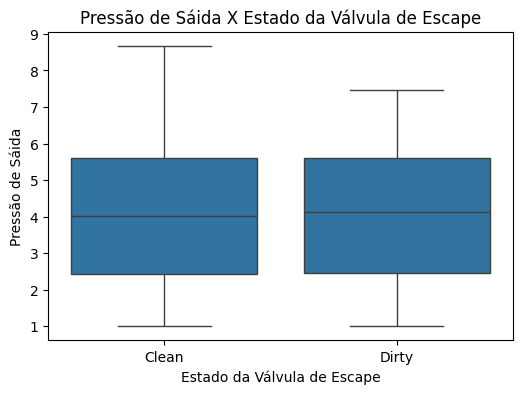

In [149]:
# Relação entre a pressão de saída e estado da válvula de escape
plt.figure(figsize=(6, 4))
sns.boxplot(x='exvalve', y='outlet_pressure_bar', data=df)
plt.title('Pressão de Sáida X Estado da Válvula de Escape')
plt.xlabel('Estado da Válvula de Escape')
plt.ylabel('Pressão de Sáida')

# Mostrar o boxplot
plt.show()

Com base no boxplot da Pressão de Saída (outlet_pressure_bar) versus o Estado da Válvula de Escape ('Clean' vs 'Dirty'), podemos tirar as seguintes conclusões:

**Medianas:** A mediana da pressão de saída é visivelmente próxima para o estado 'Dirty' da válvula de escape em comparação com o estado 'Clean'. Isso sugere que, em média, válvulas de escape sujas não estão associadas a pressões de saída do compressor mais elevadas.

**Dispersão:** A caixa (IQR) para o estado 'Dirty' é similar a do estado 'Clean'. Isso indica uma variabilidade semelhante nos níveis de pressão de saída quando a válvula de escape está suja ou limpa.

**Relação:** O boxplot demonstra não haver uma relação clara entre o estado da válvula de escape e a pressão de saída, descartando a hipótese de que válvulas de escape sujas estão associadas a pressões de saída mais altas.

Em resumo, o boxplot da pressão de saída vs estado da válvula de escape descarta a expectativa de que válvulas de escape sujas resultam em pressões de saída mais altas e com maior variabilidade.

### 3.4.5.6. Pressão de Saída da Bomba X Estado da Bomba de Água

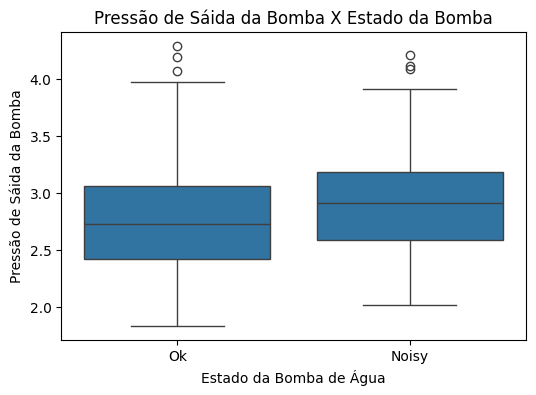

In [150]:
# Relação entre a pressão de saída da bomba de água e estado da bomba de água
plt.figure(figsize=(6, 4))
sns.boxplot(x='wpump', y='wpump_outlet_press', data=df)
plt.title('Pressão de Sáida da Bomba X Estado da Bomba')
plt.xlabel('Estado da Bomba de Água')
plt.ylabel('Pressão de Sáida da Bomba')

# Mostrar o boxplot
plt.show()

Com base no boxplot da Pressão de Saída da Bomba da Água (wpump_outlet_press) versus o Estado da Bomba da Água, podemos tirar as seguintes conclusões:

**Medianas:** A mediana da pressão de saída da bomba da água é visivelmente mais alta para o estado 'Noisy' em comparação com o estado 'Ok'. Isso sugere que, em média, bombas da água ruidosas geram uma pressão de saída maior.

**Dispersão:** A caixa (IQR) para o estado 'Noisy' parece um pouco menor do que para o estado 'Ok', indicando uma variação ligeiramente menor nos 50% centrais dos dados de pressão de saída da bomba da água quando a bomba está ruidosa.

**Outliers:** A presença de outliers em ambos estados sugere que, podem ocorrer medições de pressão de saída incomuns. É importante investigar se esses outliers representam condições operacionais atípicas, erros de medição ou outros fatores externos que influenciam pressão de saída da bomba da água.

**Relação:** O boxplot demonstra uma relação clara entre o estado da bomba da água e a pressão de saída, suportando a hipótese de que bombas da água ruidosas estão associadas a pressões de saída mais altas.

Em resumo, o boxplot da pressão de saída da bomba da água vs estado da bomba da água confirma a expectativa de que bombas da água ruidosas produzem mais pressão de saída e apresentam menor variabilidade nos níveis de pressão. Esta variável parece ser um bom indicador do estado da bomba da água.

### 3.4.5.7. Pressão de Saída da Bomba X Estado do Radiador

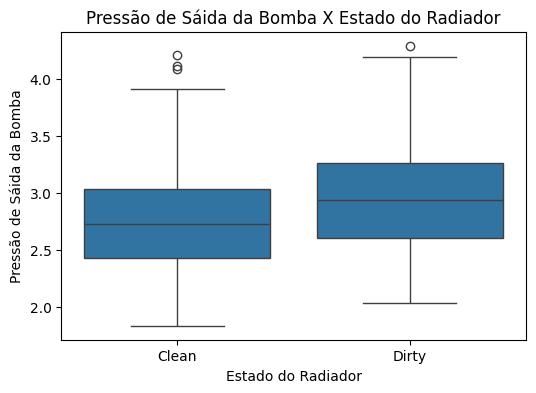

In [151]:
# Relação entre a pressão de saída da bomba de água e estado do radiador
plt.figure(figsize=(6, 4))
sns.boxplot(x='radiator', y='wpump_outlet_press', data=df)
plt.title('Pressão de Sáida da Bomba X Estado do Radiador')
plt.xlabel('Estado do Radiador')
plt.ylabel('Pressão de Sáida da Bomba')

# Mostrar o boxplot
plt.show()

Com base no boxplot da Pressão de Saída da Bomba da Água (wpump_outlet_press) versus o Estado do Radiador, podemos tirar as seguintes conclusões:

Medianas: A mediana da pressão de saída da bomba da água é visivelmente mais alta para o estado 'Dirty' em comparação com o estado 'Ok'. Isso sugere que, em média, radiadores sujos geram uma pressão de saída maior.

Dispersão: A caixa (IQR) para o estado 'Dirty' parece semelhante ao estado 'Ok', indicando uma variação similar nos 50% centrais dos dados de pressão de saída da bomba da água quando o radiador está sujo.

Outliers: A presença de outliers em ambos estados sugere que, podem ocorrer medições de pressão de saída incomuns. É importante investigar se esses outliers representam condições operacionais atípicas, erros de medição ou outros fatores externos que influenciam pressão de saída da bomba da água.

Relação: O boxplot demonstra uma relação clara entre o estado do radiador e a pressão de saída, suportando a hipótese de que radiadores sujos estão associados a pressões de saída mais altas.

Em resumo, o boxplot da pressão de saída da bomba da água vs estado do radiador confirma a expectativa de que radiadores sujos produzem mais pressão de saída. Esta variável parece ser um bom indicador do estado da bomba da água.

## 3.4.6. Matriz de Correlação e Mapa de Calor

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [152]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.loc[:, ['rpm','motor_power','torque','outlet_pressure_bar','noise_db','wpump_outlet_press','water_inlet_temp','water_outlet_temp','gaccz','haccz']].corr()


Matriz de Correlação:


,rpm,motor_power,torque,outlet_pressure_bar,noise_db,wpump_outlet_press,water_inlet_temp,water_outlet_temp,gaccz,haccz
rpm,1.000000,0.683017,-0.242899,0.001662,0.913105,0.481629,0.755047,0.752496,-0.179423,-0.232459
motor_power,0.683017,1.000000,0.470723,0.664110,0.704704,0.534411,0.831770,0.823978,0.512376,0.466881
torque,-0.242899,0.470723,1.000000,0.960135,-0.099417,0.170060,0.273886,0.273642,0.973283,0.975987
outlet_pressure_bar,0.001662,0.664110,0.960135,1.000000,0.128396,0.306907,0.475584,0.474940,0.957529,0.943720
noise_db,0.913105,0.704704,-0.099417,0.128396,1.000000,0.442434,0.693313,0.693193,-0.037175,-0.087204
wpump_outlet_press,0.481629,0.534411,0.170060,0.306907,0.442434,1.000000,0.620936,0.615404,0.208955,0.176993
water_inlet_temp,0.755047,0.831770,0.273886,0.475584,0.693313,0.620936,1.000000,0.962545,0.316110,0.269937
water_outlet_temp,0.752496,0.823978,0.273642,0.474940,0.693193,0.615404,0.962545,1.000000,0.316547,0.270495
gaccz,-0.179423,0.512376,0.973283,0.957529,-0.037175,0.208955,0.316110,0.316547,1.000000,0.997939
haccz,-0.232459,0.466881,0.975987,0.943720,-0.087204,0.176993,0.269937,0.270495,0.997939,1.000000


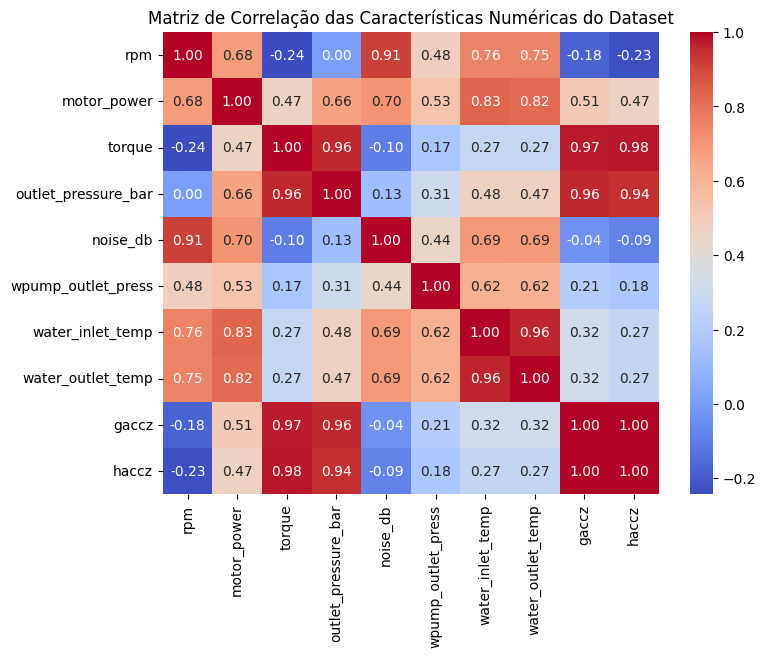

In [153]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.loc[:, ['rpm','motor_power','torque','outlet_pressure_bar','noise_db','wpump_outlet_press','water_inlet_temp','water_outlet_temp','gaccz','haccz']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Dataset')
plt.show()

O mapa de calor "Matriz de Correlação das variáveis do Processo" mostra a relação entre diferentes variáveis do processo estudado.

**Pontos-chave:**

**Correlações Positivas Fortes (vermelho):**
As variáveis torque, outlet_pressure_bar, gaccz e haccz, mostram uma forte relação positiva. A correlação entre as vibrações gaccz e haccz é 1.00, como esperado, indicando que essas duas variáveis de vibração no eixo Z se movem praticamente juntas.
Há também correlações positivas fortes entre rpm, motor_power, noise_db e as temperaturas da água (water_inlet_temp, water_outlet_temp). A correlação entre rpm e noise_db (0.91) é particularmente alta, como esperado.

**Correlações Negativas Fortes (azul):**
Neste mapa de calor, não há correlações negativas fortíssimas (próximas a -1). A correlação negativa mais notável é entre rpm e torque (-0.24), que é uma correlação negativa fraca a moderada.

**Correlações Fracas (cinza/branco):**
As áreas do mapa de calor com cores mais claras indicam correlações fracas entre as variáveis. Por exemplo, as correlações entre noise_db e torque, ou noise_db e as variáveis de vibração (gaccz, haccz), são próximas de zero.

Em resumo, o mapa de calor visualiza as fortes relações positivas que identificamos anteriormente, especialmente entre torque, outlet_pressure_bar, e as vibrações no eixo Z. Também destaca as correlações entre RPM, potência do motor, ruído e temperaturas da água.

## 3.4.7. Gráfico de Dispersão do Torque versus Temperatura de Saída da Bomda da Água

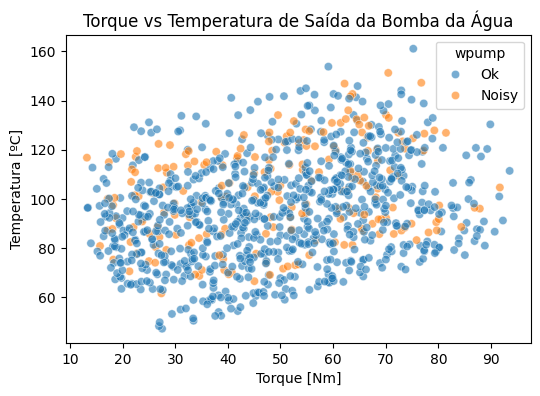

In [158]:
# torque versus temperatura de saída da bomba da água
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='torque', y='water_outlet_temp', hue='wpump', alpha=0.6)
plt.title('Torque vs Temperatura de Saída da Bomba da Água')
plt.xlabel('Torque [Nm]')
plt.ylabel('Temperatura [ºC]')

# Mostrar o gráfico
plt.show()

O gráfico de dispersão mostra a relação entre 'Torque [Nm]' no eixo X e 'Temperatura de Saída da Bomba da Água [ºC]' no eixo Y. Os pontos são coloridos indicando o estado da bomba da Água (wpump):

Azul: Bomba da Água no estado 'Ok'.
Laranja: Bomba da Água no estado 'Noisy'.

**Distribuição Geral:** A maioria dos pontos, tanto azuis ('Ok') quanto laranjas ('Noisy'), mostra uma tendência a se concentrar em certas faixas de Torque e Temperatura de Saída da Bomba da Água, refletindo a distribuição dessas variáveis que vimos anteriormente nos histogramas.

**Distribuição dos Pontos Laranjas:** Os pontos que representam a bomba da Água no estado ruidosa estão distribuídos por todo o gráfico, porém se concetram mais na região de alta temperatura.

**Regiões de Alta Temperatura e Variedade de Torque:** Há uma presença notável de pontos laranjas em regiões onde a Temperatura de Saída da Bomba da Água é mais alta. Embora esses pontos laranjas apareçam em uma variedade de níveis de Torque, eles parecem ser mais frequentes nas faixas de temperatura mais elevadas.

**Regiões de Baixa Temperatura:** Nas regiões onde a Temperatura de Saída da Bomba da Água é mais baixa, a maioria dos pontos é azul.

**Separação:** Não há uma separação clara e completa entre os pontos azuis e laranjas baseada apenas em Torque e Temperatura de Saída da Bomba da Água. Há uma sobreposição considerável das duas classes na maioria das regiões do gráfico. Isso sugere que, embora haja uma tendência para bombas 'Noisy' estarem associadas a temperaturas de saída da água mais altas (confirmando a análise anterior do boxplot), a combinação de Torque e Temperatura de Saída da Bomba da Água sozinha não permite separar perfeitamente os estados 'Ok' e 'Noisy' da bomba da Água.

Em resumo, o gráfico de dispersão visualiza que bombas da Água no estado 'Noisy' tendem a ocorrer com mais frequência em temperaturas de saída da água mais elevadas, em comparação com as bombas 'Ok'. No entanto, a relação com o Torque não é tão clara na separação dos estados da bomba da Água, e há uma sobreposição significativa entre os estados 'Ok' e 'Noisy' neste plano 2D. Isso indica que, enquanto a temperatura de saída da água é um indicador relevante para o estado da bomba da Água, outras features provavelmente são necessárias para uma distinção mais precisa.

# 4. Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [159]:
# Separar features (X) e target (y)
X = df[['rpm','motor_power','torque','outlet_pressure_bar','noise_db','wpump_outlet_press','water_inlet_temp','water_outlet_temp','gaccz','haccz']]
y = df[['bearings','wpump','radiator','exvalve']]

In [160]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [161]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (700, 10)
Dimensões de X_test: (300, 10)
Dimensões de y_train: (700, 4)
Dimensões de y_test: (300, 4)


## 4.1. Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [162]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [163]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [164]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized_train = pd.DataFrame(X_train_normalized, columns=X_train.columns)
df_normalized_test = pd.DataFrame(X_test_normalized, columns=X_train.columns)

In [165]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized_train.head())


Primeiras 5 linhas dos dados normalizados (treino):
        rpm  motor_power    torque  outlet_pressure_bar  noise_db  \
0  0.495098     0.489879  0.684457             0.687370  0.427544   
1  0.004412     0.139370  0.831553             0.674191  0.043452   
2  0.508333     0.442178  0.582117             0.598904  0.425081   
3  0.263725     0.142304  0.342418             0.263178  0.209579   
4  0.998529     0.574887  0.430690             0.433325  0.614397   

   wpump_outlet_press  water_inlet_temp  water_outlet_temp     gaccz     haccz  
0            0.244599          0.506249           0.437653  0.532399  0.545186  
1            0.180799          0.304549           0.283538  0.626504  0.664019  
2            0.343130          0.493706           0.492371  0.424669  0.436512  
3            0.130053          0.198301           0.214375  0.155275  0.166636  
4            0.492439          0.845413           0.826377  0.236308  0.246550  


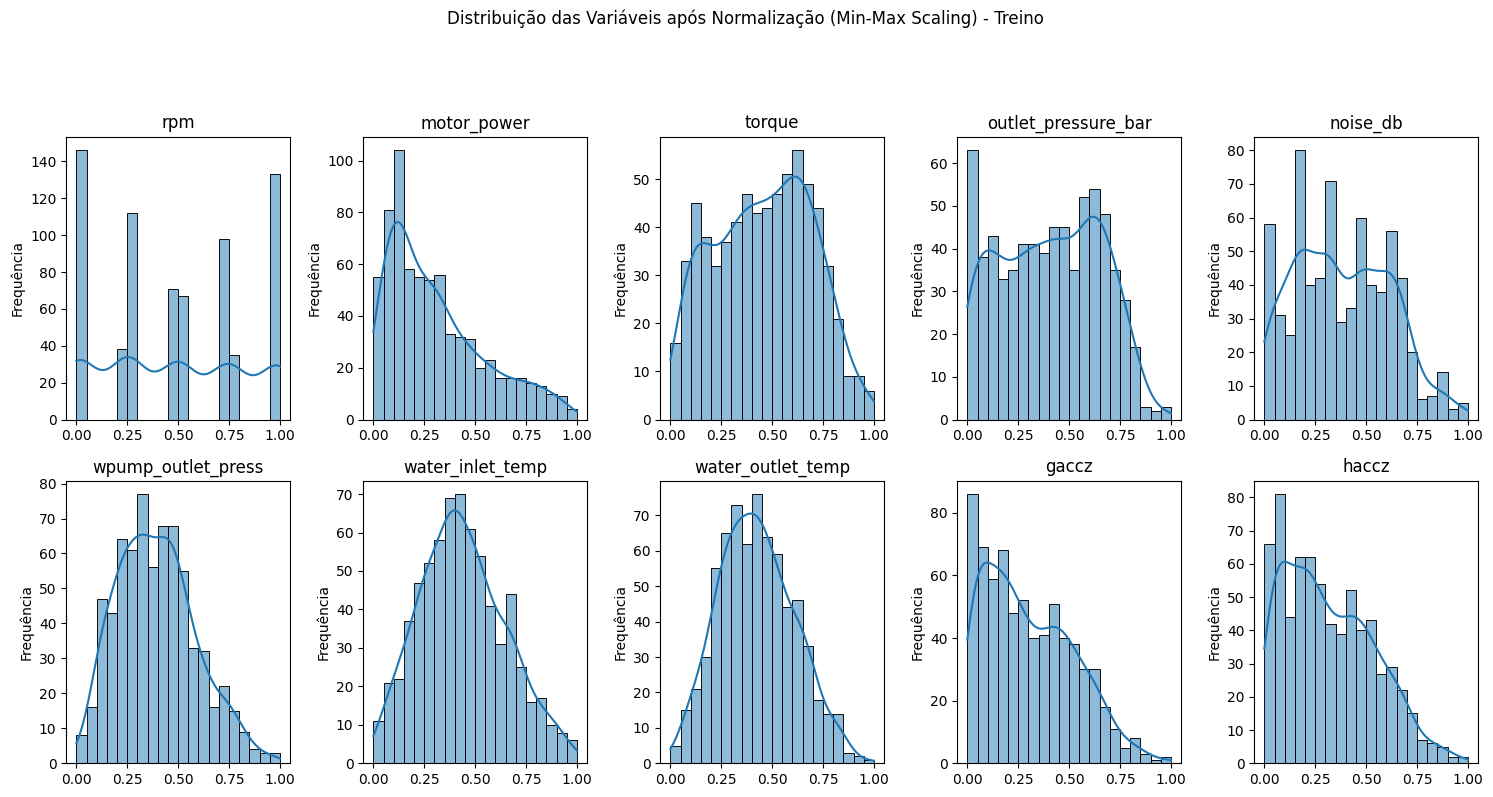

In [166]:
# Geração de Histograma para os Dados Normalizados (Conjunto de Treino)
plt.figure(figsize=(15, 8))
# Ajustar a posição do título
plt.suptitle('Distribuição das Variáveis após Normalização (Min-Max Scaling) - Treino', y=1.02)
# Definir o número de colunas
num_cols = 5
# Calcular o número de linhas
num_rows = (len(df_normalized_train.columns) + num_cols - 1) // num_cols

for i, col in enumerate(df_normalized_train.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df_normalized_train[col], kde=True, bins=20)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frequência")

# Ajusta o layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Os histogramas dos modos de falha após a normalização mostram que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## 4.2. Padronização
A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [167]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [168]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [169]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized_train = pd.DataFrame(X_train_standardized, columns=X_train.columns)
df_standardized_test = pd.DataFrame(X_test_standardized, columns=X_train.columns)

In [170]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized_train.head())


Primeiras 5 linhas dos dados padronizados (treino):
        rpm  motor_power    torque  outlet_pressure_bar  noise_db  \
0  0.029771     0.768612  0.958187             1.139985  0.185321   
1 -1.386882    -0.708705  1.579975             1.086195 -1.465697   
2  0.067982     0.567564  0.525588             0.778898  0.174734   
3 -0.638221    -0.696339 -0.487636            -0.591421 -0.751599   
4  1.483219     1.126904 -0.114504             0.103059  0.988509   

   wpump_outlet_press  water_inlet_temp  water_outlet_temp     gaccz     haccz  
0           -0.777394          0.319068           0.071224  1.053821  1.038677  
1           -1.109864         -0.644108          -0.766619  1.487178  1.581576  
2           -0.263934          0.259174           0.368699  0.557717  0.542194  
3           -1.374308         -1.151474          -1.142625 -0.682855 -0.690758  
4            0.514131          1.938682           2.184518 -0.309691 -0.325668  


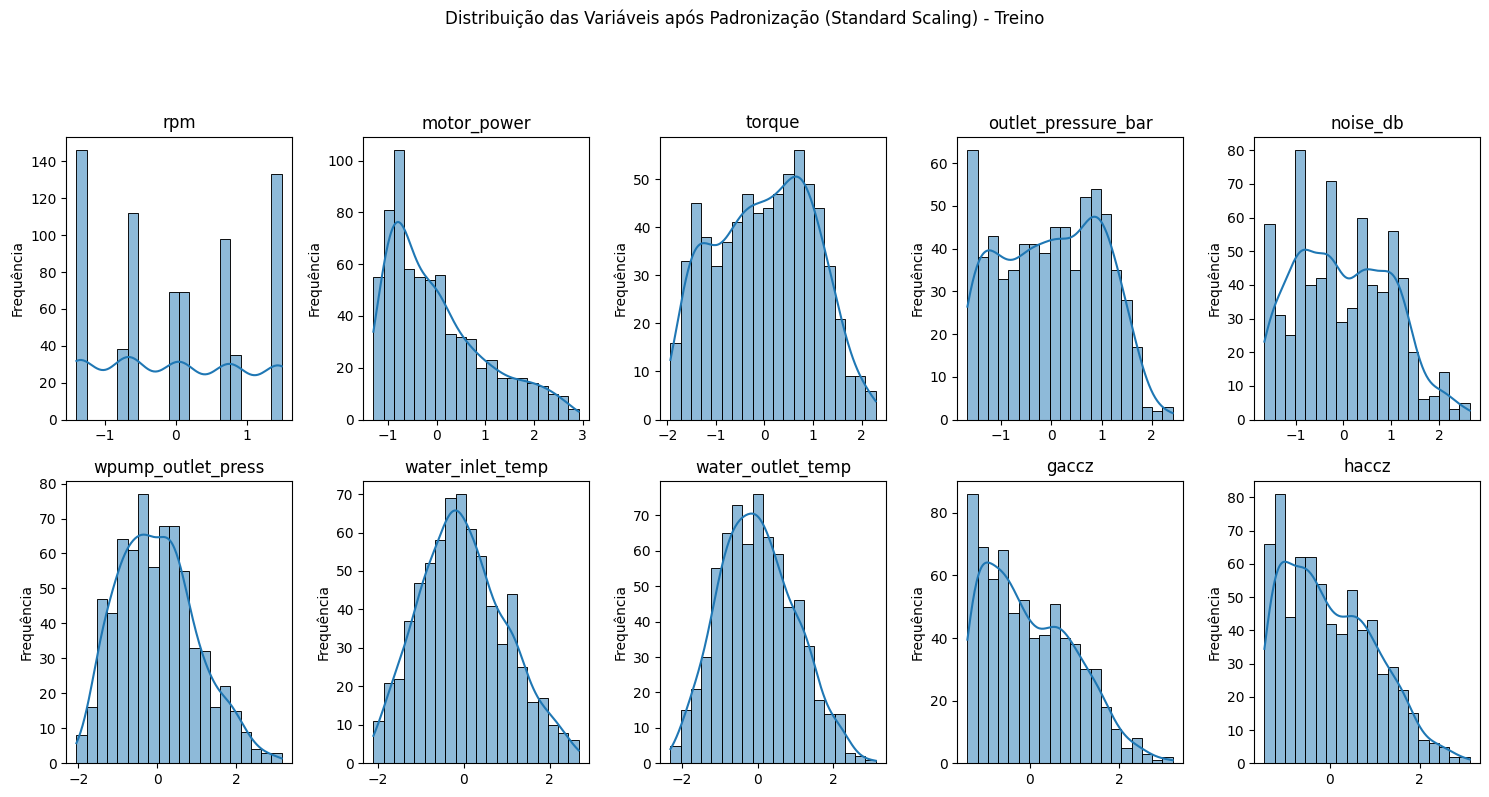

In [171]:
# Visualização da distribuição após a padronização
plt.figure(figsize=(15, 8))
# Ajustar a posição do título
plt.suptitle('Distribuição das Variáveis após Padronização (Standard Scaling) - Treino', y=1.02)
# Definir o número de colunas
num_cols = 5
# Calcular o número de linhas
num_rows = (len(df_standardized_train.columns) + num_cols - 1) // num_cols

for i, col in enumerate(df_standardized_train.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df_standardized_train[col], kde=True, bins=20)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frequência")

# Ajusta o layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

O histograma das variáveis após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## 4.3. Outras Transformações e Etapas de Pré-Processamento

A seguir são apresentadas outras etapas de pré-processamento aplicadas ao dataset, como por exemplo, importância dos atributos, redução de dimensionalidade (como PCA) e criação de novas características.


### 4.3.1. Importância de atributos (Random Forest)

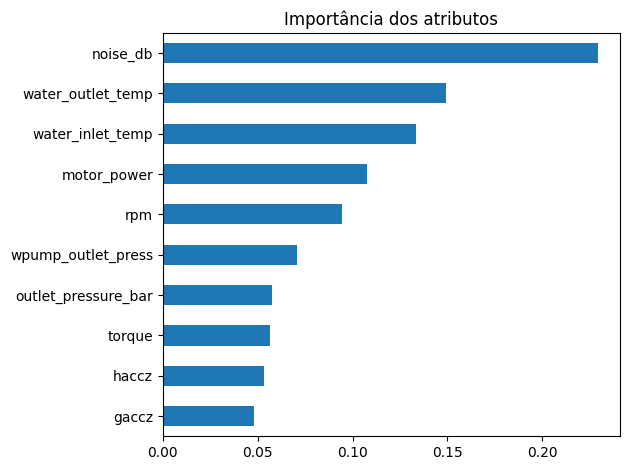

In [172]:
X = df[['rpm','motor_power','torque','outlet_pressure_bar','noise_db','wpump_outlet_press','water_inlet_temp','water_outlet_temp','gaccz','haccz']]
X = pd.get_dummies(X, drop_first=True)
y = df[['bearings','wpump','radiator','exvalve']]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', title='Importância dos atributos')
plt.tight_layout()
plt.show()

O gráfico de barras horizontais exibe a importância relativa de cada variável numérica no processo de previsão do estado dos quatro componentes ('bearings', 'wpump', 'radiator', 'exvalve') conforme avaliado por um modelo de Random Forest.

Eixo Y: Nomes dos atributos usados como entrada no modelo.
Eixo X: Importância atribuída a cada atributo, ou seja, quanto aquela variável contribui para reduzir a incerteza (impureza) nas decisões.


**Variáveis com Maior Importância:**



*   noise_db (Ruído): É o atributo mais importante para o modelo, indicando que as variações no nível de ruído têm uma forte relação com o estado dos componentes, especialmente os rolamentos, como vimos na análise de boxplot.
*   water_outlet_temp (Temperatura de Saída da Água) e water_inlet_temp (Temperatura de Entrada da Água): Ambas as temperaturas da água têm alta importância, sugerindo que o estado do sistema de refrigeração (bomba e radiador) está bem refletido nas medições de temperatura.
*   motor_power (Potência do Motor) e rpm (Velocidade Rotacional): Também aparecem com importância significativa, o que faz sentido, pois a forma como o compressor opera (potência e velocidade) impacta o desgaste e o funcionamento dos componentes.

Em resumo, o modelo Random Forest atribui maior valor a variáveis como Ruído e Temperaturas da Água para prever o estado combinado dos componentes. Variáveis relacionadas a vibração e torque/pressão de saída têm menor importância média neste contexto.

Isso sugere que, para prever o estado dos componentes, o ruído e as temperaturas do sistema de refrigeração são os preditores mais fortes, em média. O gráfico de importância dos atributos é útil para entender quais features são mais informativas para o modelo e pode guiar futuras etapas de seleção de features, embora seja importante considerar que a importância média em um modelo pode mascarar a alta importância de uma feature para um target específico (como a vibração para os rolamentos).

### 4.3.2. Redução de dimensionalidade (PCA)

In [173]:
# Mapeamento para as colunas 'bearings' e 'wpump' ('Ok' para 0, 'Noisy' para 1)
mapping_noisy_ok = {'Ok': 0, 'Noisy': 1}
df['bearings'] = df['bearings'].replace(mapping_noisy_ok)
df['wpump'] = df['wpump'].replace(mapping_noisy_ok)

# Mapeamento para as colunas 'radiator' e 'exvalve' ('Clean' para 0, 'Dirty' para 1)
mapping_dirty_clean = {'Clean': 0, 'Dirty': 1}
df['radiator'] = df['radiator'].replace(mapping_dirty_clean)
df['exvalve'] = df['exvalve'].replace(mapping_dirty_clean)

# Verificar os tipos de dados e as primeiras linhas após a substituição
print("Tipos de dados após a substituição:")
print(df.info())

Tipos de dados após a substituição:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1000 non-null   int64  
 1   rpm                  1000 non-null   int64  
 2   motor_power          1000 non-null   float64
 3   torque               1000 non-null   float64
 4   outlet_pressure_bar  1000 non-null   float64
 5   air_flow             1000 non-null   float64
 6   noise_db             1000 non-null   float64
 7   outlet_temp          1000 non-null   float64
 8   wpump_outlet_press   1000 non-null   float64
 9   water_inlet_temp     1000 non-null   float64
 10  water_outlet_temp    1000 non-null   float64
 11  wpump_power          1000 non-null   float64
 12  water_flow           1000 non-null   float64
 13  oilpump_power        1000 non-null   float64
 14  oil_tank_temp        1000 non-null   float64
 15  gac

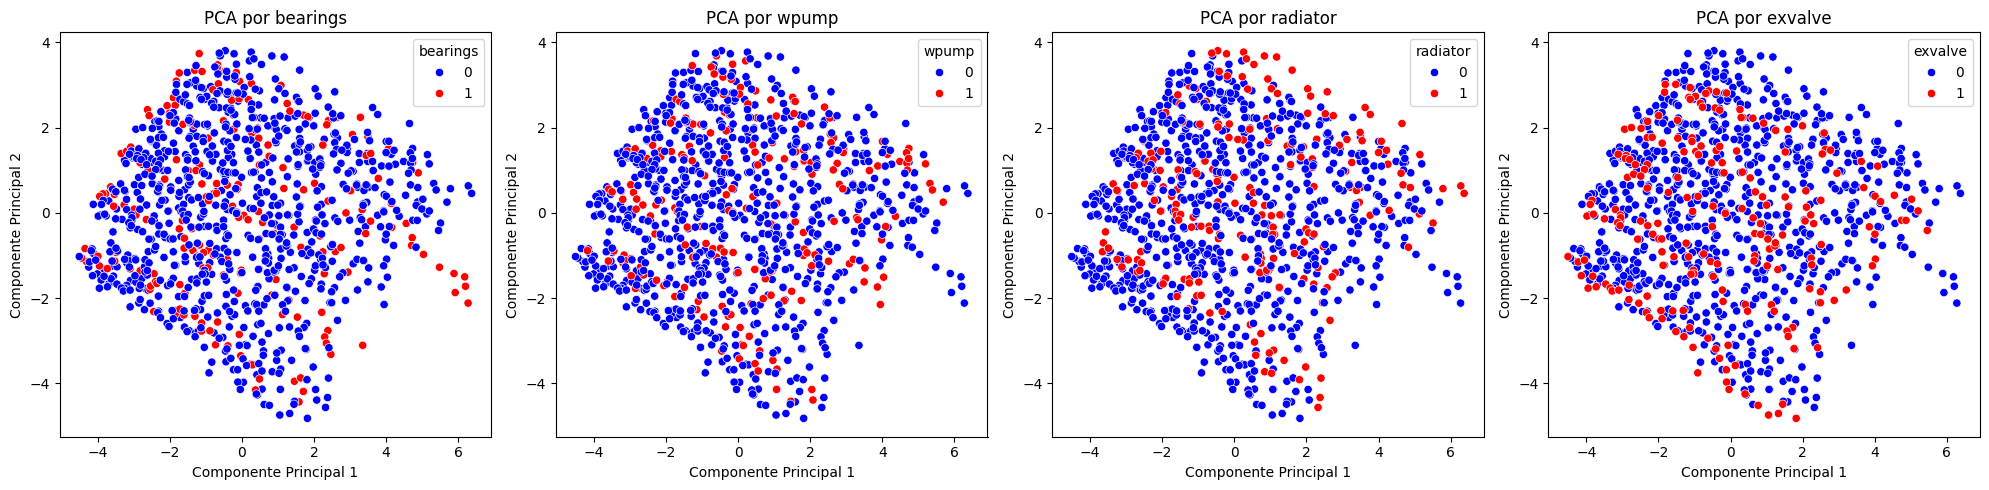

In [174]:
# Padroniza os dados numéricos antes do PCA
X_std = scaler_std.fit_transform(df[['rpm','motor_power','torque','outlet_pressure_bar','noise_db','wpump_outlet_press','water_inlet_temp','water_outlet_temp','gaccz','haccz']])

pca = PCA(n_components=2)
components = pca.fit_transform(X_std)

# Colunas para colorir os subplots
columns_to_color = ['bearings', 'wpump', 'radiator', 'exvalve']

# Define uma paleta de cores personalizada para 0 e 1 (ex: azul para 0, vermelho para 1)
custom_palette = {0: 'blue', 1: 'red'}

# Cria uma figura e um conjunto de subplots
fig, axes = plt.subplots(1, len(columns_to_color), figsize=(20, 5)) # 1 linha, 4 colunas

# Achatar o array de eixos para facilitar a iteração
axes = axes.flatten()

# Itera sobre as colunas e cria um subplot para cada uma
for i, col in enumerate(columns_to_color):
    sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df[col], ax=axes[i], palette=custom_palette, alpha=1.0, legend='full') # Usando paleta personalizada e alpha=1.0
    axes[i].set_title(f'PCA por {col}')
    axes[i].set_xlabel('Componente Principal 1')
    axes[i].set_ylabel('Componente Principal 2')
    # Ajusta o título da legenda
    axes[i].get_legend().set_title(col)


plt.tight_layout()
plt.show()

Este gráfico mostra os dados transformados pelos 2 primeiros componentes principais extraídos por PCA, uma técnica de redução de dimensionalidade. Cada ponto representa uma instância (registro) do dataset, projetado num plano 2D, mantendo o máximo possível da variância dos dados originais.

Eixo X: Componente Principal 1

Eixo Y: Componente Principal 2

Cores (gradiente de azul a vermelho): Representam a condição da variável: Azul = Normal (valor 0) e Vermelho = Suja/Ruidosa (valor 1).

**Interpretação dos resultados:**

Distribuição geral: A maioria dos pontos está concentrada em uma região central, principalmente em tons de azul. Isso indica uma alta concentração de registros no estado 'Normal', o que é esperado, já que a classe 'Normal' (0) é a majoritária (800 instâncias) e a classe 'Suja/Ruidosa' (1) é a minoritária neste dataset (200 instâncias).

Pontos vermelhos (falhas): Os pontos em tons de vermelho estão mais dispersos em relação à concentração azul. Há regiões da projeção com maior densidade de pontos vermelhos, especialmente nas áreas mais periféricas do gráfico.

Separação Visual: Isso sugere que as instâncias com 'Falha' possuem padrões distintos nas características numéricas em relação às instâncias 'Normal'. Embora não haja uma separação linear perfeita em 2D, a tendência de agrupamento dos pontos vermelhos em áreas diferentes dos pontos azuis é visível.

Em resumo, o gráfico de PCA visualiza que as instâncias com a classe 'Suja/Ruidosa' tendem a se diferenciar das instâncias normais no espaço reduzido de duas dimensões. A concentração da classe ('Normal') na região central e a dispersão e agrupamento da classe ('Suja/Ruidosa') em outras áreas indicam que as features numéricas contêm informações relevantes para a predição de falhas.

### 4.3.3. Criação de novas características (Feature Engineering)

In [175]:
# Cria as novas features
df['water_temp_dif'] = df['water_outlet_temp'] - df['water_inlet_temp']  # Diferença da temperatura de saída com a temperatura de entrada
df['torque_speed_ratio'] = df['torque'] / (df['rpm'] + 1)  # Relação torque/velocidade

# Verifica o dataset com as novas features
df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor,water_temp_dif,torque_speed_ratio
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,1.213344,1.409218,2.962484,0,0,0,0,Stable,4.092846,0.055023
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,1.210674,1.379050,2.938135,0,0,0,0,Stable,7.683510,0.060370
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,1.210612,1.373490,2.991878,0,0,0,0,Stable,1.199029,0.067509
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,1.213223,1.443234,3.096158,0,0,0,0,Stable,11.819442,0.075664
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,1.209216,1.405190,3.059417,0,0,0,0,Stable,3.548262,0.076652


Feature Engineering é o processo de criar, transformar ou combinar variáveis (features) do dataset original com o objetivo de melhorar a performance dos modelos de machine learning. É uma das etapas mais importantes da modelagem, pois bons atributos podem revelar padrões ocultos, melhorar a capacidade preditiva do modelo e até reduzir o overfitting.

No caso do dataset Predictive Maintenance Dataset - Air Compressor, foram criadas duas novas features:

**a) water_temp_dif:** Mede a diferença das temperaturas da água de arrefecimento na entrada e saída — pode indicar anomalias térmicas.

**b) torque_speed_ratio:** Relação entre torque e rotação — útil para detectar esforço excessivo ou travamento.

# 5. Conclusão

A análise exploratória e as etapas de pré-processamento do dataset Predictive Maintenance Dataset - Air Compressor foram essenciais para compreender a natureza dos dados e prepará-los adequadamente para a modelagem preditiva. Inicialmente, verificamos que o dataset é completo, sem a presença de valores nulos, o que simplificou a etapa de limpeza. As estatísticas descritivas forneceram um panorama dos atributos numéricos, e a análise da distribuição das variáveis revelou características importantes, como a multimodalidade em algumas variáveis operacionais (RPM, Torque, Potência do Motor) e a distribuição aproximadamente normal das temperaturas da água.

A análise visual, utilizando boxplots, foi particularmente esclarecedora. Demonstrou-se uma relação clara e esperada entre a vibração (especialmente nos eixos Z) e o estado dos rolamentos, assim como entre o ruído e o estado dos rolamentos. Observamos também uma relação significativa entre a pressão de saída e o estado da válvula de escape. Para o sistema de refrigeração, embora a temperatura da água de entrada não mostrasse uma relação forte com o estado da bomba da água de arrefecimento ou do radiador, a temperatura da água de saída e a pressão de saída da bomba da água apresentaram diferenças notáveis quando esses componentes estavam em estado anormal, indicando sua relevância para a predição de falhas no sistema de arrefecimento.

As etapas de pré-processamento, incluindo a codificação binária das variáveis de estado dos componentes e a padronização/normalização dos dados numéricos, garantiram que os dados estivessem em um formato adequado para algoritmos de machine learning. A visualização via PCA reforçou que, embora não haja uma separação linear perfeita em 2D para a falha geral, os estados individuais dos componentes, especialmente os rolamentos, mostram uma separação mais clara neste espaço reduzido, indicando que as features numéricas contêm informações preditivas valiosas.

Em suma, a fase de análise e pré-processamento forneceu insights cruciais sobre as relações entre as variáveis operacionais e o estado dos componentes, destacou o desbalanceamento do dataset e preparou os dados de forma robusta para as próximas etapas de modelagem e construção de um modelo preditivo capaz de antecipar falhas no compressor.

As cinco hipóteses contidas no item 1.3 foram validadas e são apresentadas abaixo:

1.   Compressor com vibração elevada (gacc/hacc) está associado a rolamentos desgastados.
  **Análise:** Com base na análise dos Boxplots das variáveis de vibração gaccz e haccz versus o estado do rolamento (bearings), a hipótese é considerada verdadeira.
  **Justificativa:** Os boxplots mostram consistentemente que, para ambas as variáveis, a mediana e a distribuição geral da vibração são significativamente mais altas quando os rolamentos estão no estado 'Noisy' em comparação com o estado 'Ok'. Isso indica que a vibração elevada, especialmente no eixo Z, é um forte indicador de rolamentos ruidosos/desgastados, corroborando a expectativa.

2.   Ruído (noise_db) elevado está associado a rolamentos desgastados.
  **Análise:** Com base na análise do Boxplot da variável noise_db versus o estado do rolamento (bearings), a hipótese é considerada verdadeira.
  **Justificativa:** O boxplot demonstra claramente que a mediana e a distribuição geral do ruído são mais altas quando os rolamentos estão no estado 'Noisy'. Equipamentos ruidosos são, de fato, um sinal associado a rolamentos desgastados, confirmando a hipótese.

3.   Altas temperaturas na saída ou no sistema de água tem relação com a condição do sistema de refrigeração.
  **Análise:** Com base na análise dos Boxplots das variáveis water_inlet_temp e water_outlet_temp versus o estado da bomba da água (wpump) e do radiador (radiator), esta hipótese é verdadeira.
  **Justificativa:** A análise dos boxplots da temperatura de saída da água (water_outlet_temp) versus o estado da bomba da água e do radiador mostrou que, embora a diferença nas medianas não fosse tão acentuada quanto em outras relações, as temperaturas de saída da água são mais altas quando a bomba está 'Noisy' e o radiador está 'Dirty'. Por ser um sistema fechado, a temperatura de entrada (water_inlet_temp) também se mostraram mais altas nessa situação. Portanto, as altas temperaturas da água estão relaciondas com a condição do sistema de refrigeração (bomba e radiador).

4.   Pressão de saída fora da faixa operacional indica válvula de escape ou obstrução.
  **Análise:** Com base na análise do Boxplot da variável outlet_pressure_bar versus o estado da válvula de escape (exvalve), a hipótese não pode ser confirmada.
  **Justificativa:** O boxplot não mostrou uma diferença na mediana e na distribuição da pressão de saída, com valores aproximados em ambas condições da válvula de escape.

5.   Pressão na bomba do sistema de água tem relação com a condição do sistema de refrigeração.
  **Análise:** Com base na análise do Boxplot da variável wpump_outlet_press versus o estado da bomba da água (wpump) e do radiador (radiator), a hipótese é considerada verdadeira.
  **Justificativa:** O boxplot da pressão de saída da bomba da água versus o estado da bomba da água e do radiador mostrou uma diferença clara na mediana, com a pressão sendo maior quando ambos componentes estão no estado 'Noisy' ou 'Dirty'.  Pressões anormais (mais altas neste caso) estão claramente associadas a condição dos componentes do sistema de arrefecimento, corroborando a hipótese.

Em resumo, a análise exploratória dos dados suportou fortemente as relações hipotetizadas entre as variáveis operacionais e o estado dos componentes, com exceção da hipótese 4, fornecendo uma base sólida para a modelagem preditiva de falhas no compressor.